In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from PIL import Image
import glob
import cv2
import os
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [2]:
all_data = 'C:/Users/xegah/Downloads/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
full_label = []
for folder in os.listdir(all_data):
    for n in range(len(os.listdir(all_data+'/'+folder))):
        full_label.append(folder)

In [3]:
# x_data = np.array( [np.array(cv2.imread(all_data+'/'+folder+'/'+img)) for folder in os.listdir(all_data+'/') for img in os.listdir(all_data+'/'+folder+'/')] )
# print (x_data.shape)

In [4]:
plant = []
disease = []
for i in full_label:
    plant.append(i.split('___')[0]), disease.append(i.split('___')[1])

In [5]:
len(full_label), len(plant), len(disease)

(70295, 70295, 70295)

In [6]:
df = pd.DataFrame({'full_label':full_label, 'plant':plant, 'disease':disease})

In [7]:
df.head()

,full_label,plant,disease
0,Apple___Apple_scab,Apple,Apple_scab
1,Apple___Apple_scab,Apple,Apple_scab
2,Apple___Apple_scab,Apple,Apple_scab
3,Apple___Apple_scab,Apple,Apple_scab
4,Apple___Apple_scab,Apple,Apple_scab


In [8]:
print('Classes:', df.full_label.value_counts().to_frame().shape[0])
df.full_label.value_counts().to_frame().rename(columns={'full_label':'no. of images'})

Classes: 38


,no. of images
Soybean___healthy,2022
Apple___Apple_scab,2016
Orange___Haunglongbing_(Citrus_greening),2010
Apple___healthy,2008
"Pepper,_bell___healthy",1988
Apple___Black_rot,1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1961
Potato___Late_blight,1939
Potato___Early_blight,1939
Tomato___healthy,1926


In [9]:
print('Plants:', df.plant.value_counts().to_frame().shape[0])
df.plant.value_counts().to_frame().rename(columns={'plant':'no. of images'})

Plants: 14


,no. of images
Tomato,18345
Apple,7771
Corn_(maize),7316
Grape,7222
Potato,5702
"Pepper,_bell",3901
Strawberry,3598
Peach,3566
Cherry_(including_sour),3509
Soybean,2022


In [10]:
print('Disease:', df.disease.value_counts().to_frame().shape[0])
df.disease.value_counts().to_frame().rename(columns={'disease':'no. of images'})

Disease: 21


,no. of images
healthy,22294
Bacterial_spot,5453
Black_rot,3875
Early_blight,3859
Late_blight,3790
Powdery_mildew,3419
Apple_scab,2016
Haunglongbing_(Citrus_greening),2010
Tomato_Yellow_Leaf_Curl_Virus,1961
Esca_(Black_Measles),1920


In [11]:
df['healthy'] = (df['disease'] == 'healthy').astype('int64')

In [12]:
print('% Healthy:', (df['healthy'].sum() / len(df)).round(3))

% Healthy: 0.317


In [14]:
# Due to the large size of the data set, we will limit it to 100 instances per class
all_data = 'C:/Users/xegah/Downloads/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

limit = 100
X_limited = np.array( [np.array(cv2.imread(all_data+'/'+folder+'/'+img)) for folder in os.listdir(all_data+'/') for index, img in enumerate(os.listdir(all_data+'/'+folder+'/')) if index < limit] )
print (X_limited.shape)

(3800, 256, 256, 3)


In [15]:
X_limited = X_limited/256
X_limited.shape

(3800, 256, 256, 3)

In [16]:
X_limited.size

747110400

In [17]:
labels_limited = [folder for folder in os.listdir(all_data) for index, img in enumerate(os.listdir(all_data+'/'+folder)) if index < limit]

In [18]:
len(labels_limited)

3800

In [19]:
unique_labels = set(labels_limited)
conv_dct = {label : index for index, label in enumerate(unique_labels)}

In [20]:
y_limited = np.array([conv_dct[label] for label in labels_limited]) 

In [21]:
y_limited

array([12, 12, 12, ..., 17, 17, 17])

In [22]:
X_limited.shape

(3800, 256, 256, 3)

In [23]:
from sklearn import utils
X_limited_sh, y_limited_sh = utils.shuffle(X_limited, y_limited)

In [24]:
y_limited_sh[9]

21

In [25]:
conv_dct_rev = { v : k for k,v in conv_dct.items()}

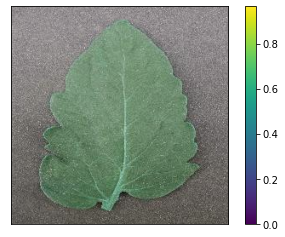

In [26]:
plt.figure()
plt.imshow(X_limited_sh[0])
plt.colorbar()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

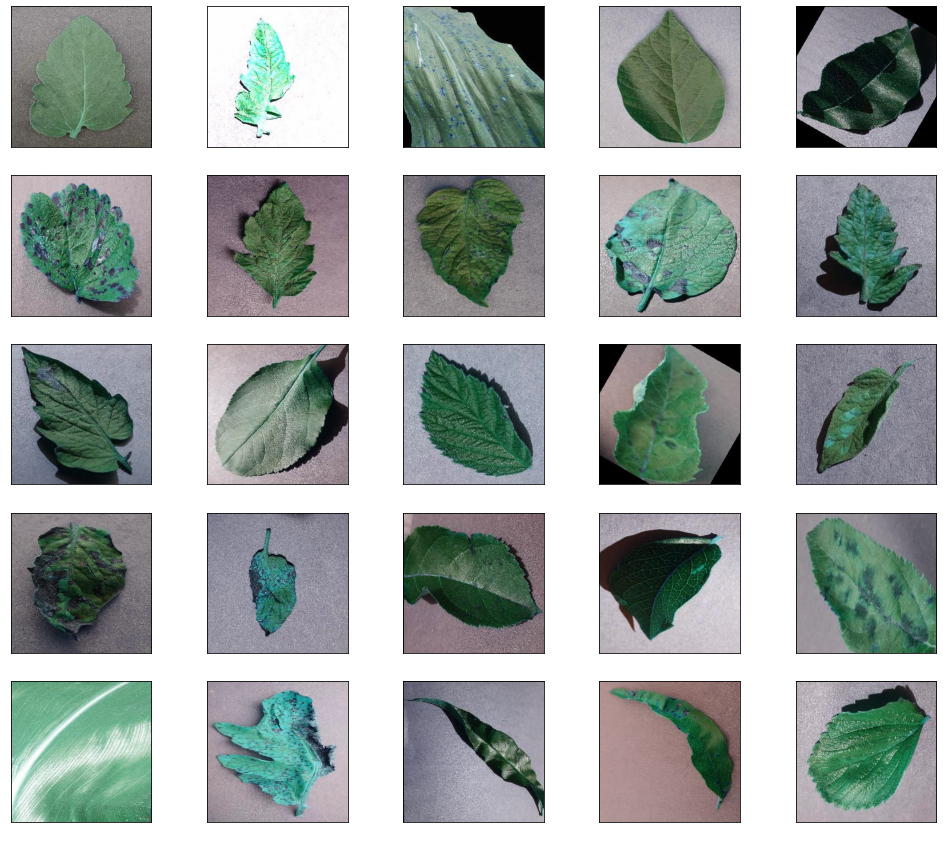

In [27]:
plt.figure(figsize=(17, 15))
for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_limited_sh[i])
    plt.xlabel(conv_dct_rev[y_limited_sh[i]], c='w')
plt.show()